In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
max_b=pd.read_csv('~D:/Vasiliev/PERMAK-A/nv/8d9d/max_cor_b.csv')
max_m=pd.read_csv('~D:/Vasiliev/PERMAK-A/nv/8d9d/max_cor_m.csv')
max_e=pd.read_csv('~D:/Vasiliev/PERMAK-A/nv/8d9d/max_cor_e.csv')
bad_state=19

In [3]:
def ExtractingMax(df):
    maxs=[]
    for i in range(1,100):
        df_1=df.query('state==@i');
        df_2=df_1.sort_values('kq');
        _tvs=df_2.tail(1).tvs;
        df_3=df_2.sort_values('dkr');
        maxs.append(df_3.tail(1));
    return maxs;
        
## Algorithm works well
def CalculateDeviations(_nominal, _deviated):
    dkr=[]
    for _state in pd.unique(_deviated.state):
        df=_deviated.query('state==@_state');
        df.index=np.arange(0,len(df),step=1);
        for i in range(len(df)):
            if (_nominal.tvs[i]==df.loc[i,'tvs']):
                kr1=_nominal.kr[i];
                kr2=df.loc[i,'kr'];
                dev=100*(kr2-kr1)/kr1;
                dkr.append(dev);
    return dkr;

def PlotDataFrame(_name,legend_prefix,df1):
    plt.figure(figsize=(12,10));
    bind=np.arange(min(df1[_name]),max(df1[_name]),step=1);
    plt.grid(True);
    plt.xlabel('Всплески энерговыделения, %', fontsize=20);
    plt.ylabel('Частота', fontsize=20);
    plt.xticks(fontsize=16);
    plt.yticks(fontsize=16);
    percent=95
    quant = st.scoreatpercentile(df1[_name],percent)
    plt.hist(df1[_name],bind,label='{}, dkr(95%)={:.2f}'.format(legend_prefix,quant),alpha=0.75, color='blue');    
    plt.vlines(quant,0,5,color='red')
    plt.legend(fontsize=20);
    plt.title('Маскимальное отклоненение в энерговыделении угловых твэлов',fontsize=20);
    plt.show();
    

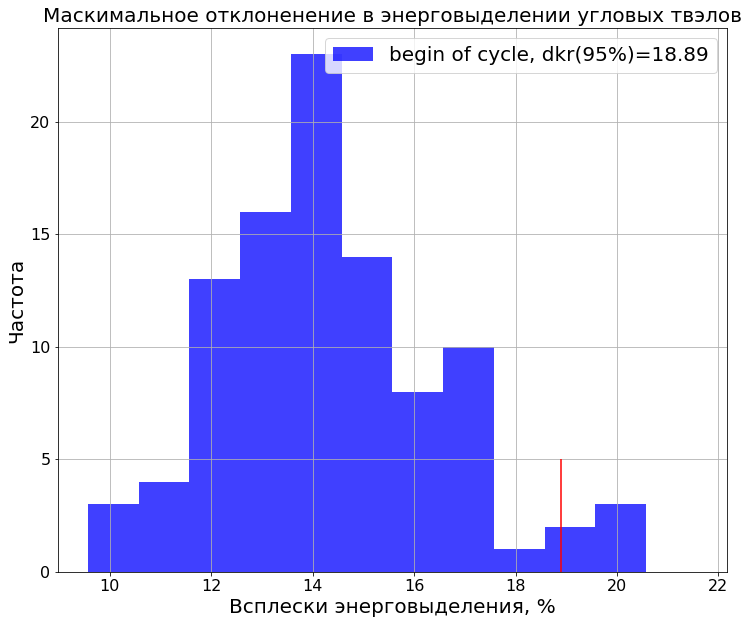

In [4]:
nom_b=max_b.query('state==0')
max_b=max_b.query('state!=0 & state!=@bad_state')
max_b['dkr']=CalculateDeviations(nom_b,max_b);
boc=ExtractingMax(max_b)
boc=pd.concat(boc[i] for i in range(len(boc)))
PlotDataFrame('dkr','begin of cycle',boc)

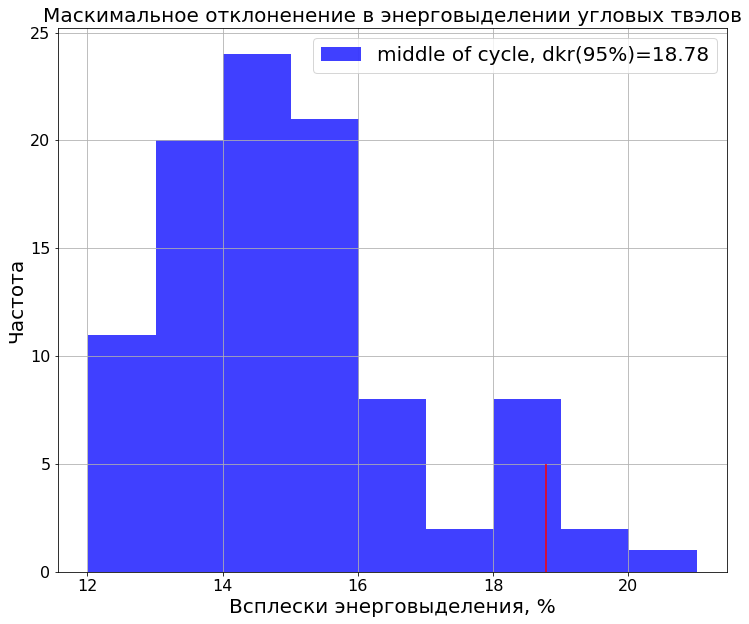

In [5]:
nom_m=max_m.query('state==0')
max_m=max_m.query('state!=0 & state!=@bad_state')
max_m['dkr']=CalculateDeviations(nom_m,max_m);
moc=ExtractingMax(max_m)
moc=pd.concat(moc[i] for i in range(len(moc)))
PlotDataFrame('dkr','middle of cycle',moc)

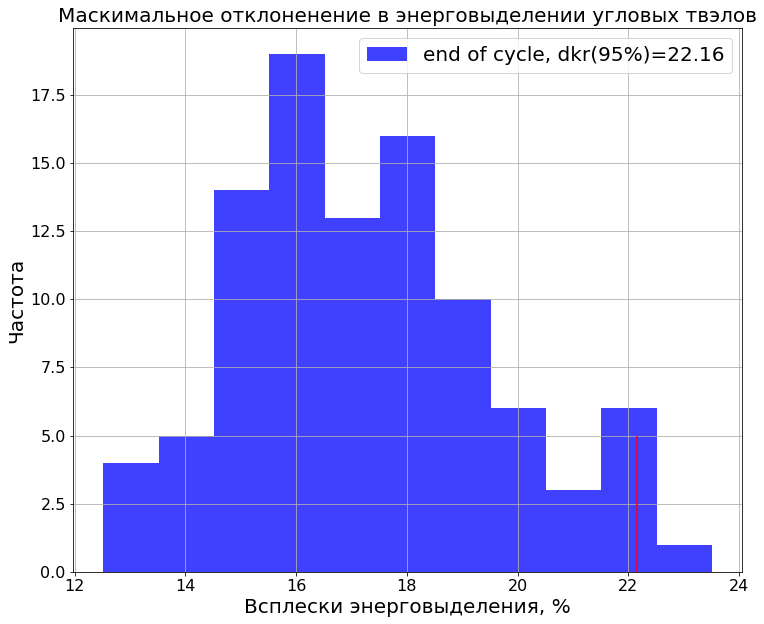

In [6]:
nom_e=max_e.query('state==0')
max_e=max_e.query('state!=0 & state!=@bad_state')
max_e['dkr']=CalculateDeviations(nom_e,max_e);
eoc=ExtractingMax(max_e)
eoc=pd.concat(eoc[i] for i in range(len(eoc)))
PlotDataFrame('dkr','end of cycle',eoc)